# MACHINE LEARNING PROJECT-CLASSIFICATION Problem statement.

### SMS SPAM CLASSIFIER- Predictive analysis

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

### >>>>ham(legitimate)  "OR" SPAM

### Life Cycle of the Project:
   * Importing the dataset and necessary modules/libraries
   * Data Preprocessing: Data Cleaning
   * EDA
   * Feature Engineering
   * Model Building
   * Evaluation
   * Depolyement of the website

### 1. Importing the Dataset

In [65]:
import pandas as pd
import numpy as np

In [66]:
df=pd.read_csv(r'C:\Users\Prabhat Dangi\Desktop\spam.csv',encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1724,ham,There bold 2 &lt;#&gt; . Is that yours,NaN,NaN,NaN
167,ham,"Hi frnd, which is best way to avoid missunders...",NaN,NaN,NaN
42,spam,07732584351 - Rodger Burns - MSG = We tried to...,NaN,NaN,NaN
1117,spam,"449050000301 You have won a å£2,000 price! To ...",NaN,NaN,NaN
418,ham,"Alright, I'll head out in a few minutes, text ...",NaN,NaN,NaN


##### Getting a detailed information about the data.

In [67]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [68]:
df.shape

(5572, 5)

In [69]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


###  Data Cleaning

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [71]:
# we can drop the last three columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [72]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
1506,spam,Thanks for the Vote. Now sing along with the s...
305,ham,Yup... From what i remb... I think should be c...
242,ham,"Okay. No no, just shining on. That was meant t..."
247,ham,Kallis wont bat in 2nd innings.
3892,ham,Have you heard from this week?


In [74]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [75]:
df['Target']=encoder.fit_transform(df['Target'])

In [76]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


###### 0 >>> ham and 1 >>> spam

In [77]:
 # missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [78]:
#duplicate values
df.duplicated().sum()

403

In [79]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [80]:
df.duplicated().sum()

0

In [81]:
df.shape

(5169, 2)

### 3. EDA

In [82]:
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

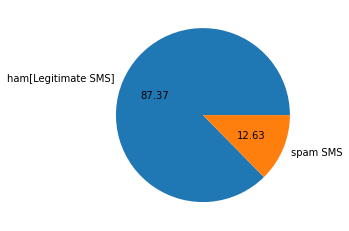

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

In [84]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham[Legitimate SMS]','spam SMS'],autopct="%0.2f")
plt.show()
plt.figure(figsize=(30,10))

###### Note:Data is Imbalanced

In [85]:
#!pip install nltk

In [86]:
import nltk

In [87]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Prabhat
[nltk_data]     Dangi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

In [89]:
#Creating a new column named num_characters which say the number of characters(letters,numbers) in a sentence

df['num_characters']=df['Text'].apply(len)

In [90]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [91]:
df['Text'].apply(lambda x:nltk.word_tokenize(x))    ## splitted the sentence into single words using nltk.word_tokenize

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [92]:
# no. of words used in per sms
df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [93]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [94]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [95]:
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [96]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [97]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [98]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [99]:
## for ham sms
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [100]:
## for spam sms
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [101]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

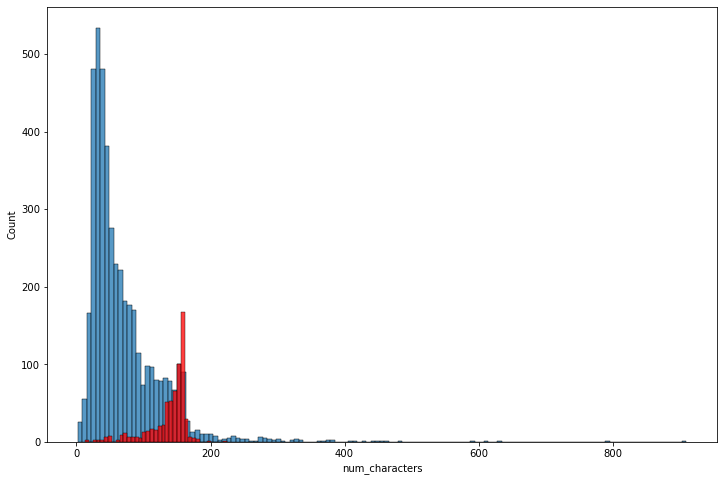

In [102]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

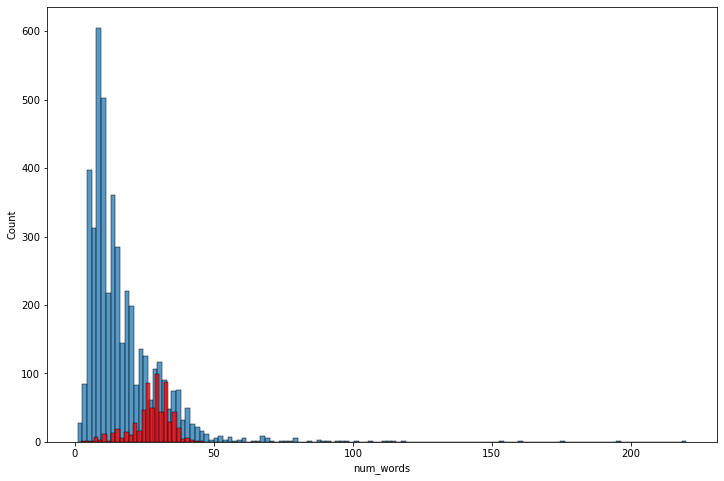

In [103]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

<Figure size 864x576 with 0 Axes>

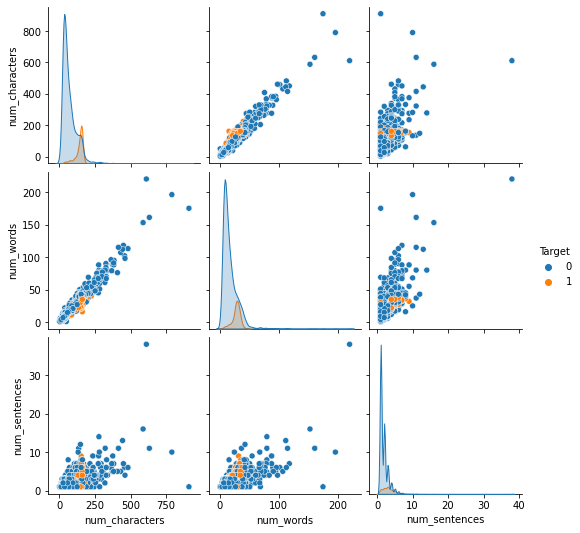

In [104]:
plt.figure(figsize=(12,8))
sns.pairplot(df,hue='Target')

In [105]:
df.corr()

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262969,0.267602
num_characters,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sentences,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

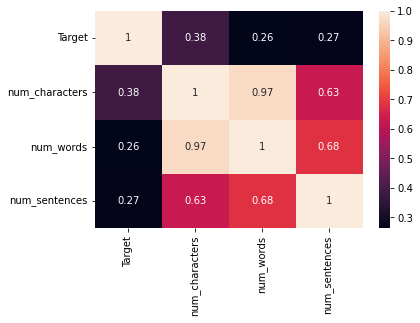

In [106]:
sns.heatmap(df.corr(),annot=True)

In [107]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Prabhat
[nltk_data]     Dangi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
## This are the words that forms a sentence but do not contribute in the meaning of a sentence.


from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [109]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [110]:
#stemming
#It brings all the words to a root form.

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [111]:
def transform_text(text):
    text=text.lower()              #convert the entire text to lower case
    text=nltk.word_tokenize(text)  #Split the sentence into words.
    
    y=[]                           # This function will remove any 
    for i in text:                 # kind of special characters like 
        if i.isalnum():            # % # ! & 
            y.append(i)
    
    
    # This command will remove those stopwords and punctuation from the sentence.
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
     
            
    return " ".join(y)


In [112]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [113]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [114]:
df['transformed_text']=df['Text'].apply(transform_text)

In [115]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [116]:
#!pip install wordcloud

In [117]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [118]:
## Spam word cloud

spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

#### Most common words in spam messages.

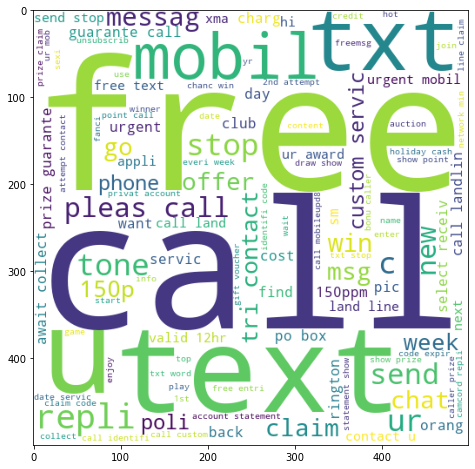

In [119]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

#### Most common words in ham or legit messages.

In [120]:
# Ham word cloud

ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

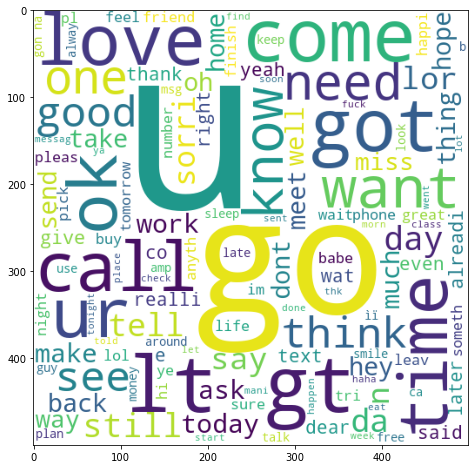

In [121]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

### Extracting top 30 words in the spam messages

In [122]:
## Top 30 words used in Ham and Spam messages:

## We need to write a customized code


# Extracting all the spam messages

df[df['Target']==1]['transformed_text'].tolist()

# All the messages got into a one big list.


['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [123]:
## All the elements in the list can be seen.

for msg in df[df['Target']==1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [124]:
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        print(word)

free
entri
2
wkli
comp
win
fa
cup
final
tkt
21st
may
text
fa
87121
receiv
entri
question
std
txt
rate
c
appli
08452810075over18
freemsg
hey
darl
3
week
word
back
like
fun
still
tb
ok
xxx
std
chg
send
rcv
winner
valu
network
custom
select
receivea
prize
reward
claim
call
claim
code
kl341
valid
12
hour
mobil
11
month
u
r
entitl
updat
latest
colour
mobil
camera
free
call
mobil
updat
co
free
08002986030
six
chanc
win
cash
100
pound
txt
csh11
send
cost
6day
tsandc
appli
repli
hl
4
info
urgent
1
week
free
membership
prize
jackpot
txt
word
claim
81010
c
lccltd
pobox
4403ldnw1a7rw18
xxxmobilemovieclub
use
credit
click
wap
link
next
txt
messag
click
http
england
v
macedonia
dont
miss
news
txt
ur
nation
team
87077
eg
england
87077
tri
wale
scotland
poboxox36504w45wq
thank
subscript
rington
uk
mobil
charg
pleas
confirm
repli
ye
repli
charg
07732584351
rodger
burn
msg
tri
call
repli
sm
free
nokia
mobil
free
camcord
pleas
call
08000930705
deliveri
tomorrow
sm
ac
sptv
new
jersey
devil
detroit
red
wi

text
wap
82468
januari
male
sale
hot
gay
chat
cheaper
call
nation
rate
cheap
peak
stop
text
call
08712460324
money
r
lucki
winner
2
claim
prize
text
money
2
88600
give
away
text
rate
box403
w1t1ji
dear
matthew
pleas
call
09063440451
landlin
complimentari
4
lux
tenerif
holiday
cash
await
collect
ppm150
sae
cs
box334
sk38xh
urgent
call
09061749602
landlin
complimentari
4
tenerif
holiday
cash
await
collect
sae
cs
box
528
hp20
1yf
150ppm
get
touch
folk
wait
compani
txt
back
name
age
opt
enjoy
commun
ur
current
500
pound
maxim
ur
send
go
86688
cc
08718720201
po
box
filthi
stori
girl
wait
urgent
tri
contact
today
draw
show
prize
guarante
call
09050001808
land
line
claim
m95
valid12hr
congrat
2
mobil
3g
videophon
r
call
09063458130
videochat
wid
mate
play
java
game
dload
polyph
music
nolin
rentl
panason
bluetoothhdset
free
nokia
free
motorola
free
doublemin
doubletxt
orang
contract
call
mobileupd8
08000839402
call
2optout
free
1st
week
no1
nokia
tone
4
ur
mob
everi
week
txt
nokia
8007
get
txt

150ppm
eeri
nokia
tone
4u
rpli
tone
titl
8007
eg
tone
dracula
8007
titl
ghost
addamsfa
munster
exorcist
twilight
pobox36504w45wq
150p
sexi
singl
wait
text
age
follow
gender
wither
f
gay
men
text
age
follow
freemsg
claim
ur
250
sm
ok
84025
use
web2mobil
2
ur
mate
etc
join
c
box139
la32wu
16
remov
txtx
stop
85233
free
rington
repli
real
well
done
england
get
offici
poli
rington
colour
flag
yer
mobil
text
tone
flag
84199
txt
eng
stop
box39822
w111wx
final
chanc
claim
ur
worth
discount
voucher
today
text
ye
85023
savamob
member
offer
mobil
cs
savamob
pobox84
m263uz
sub
16
sm
servic
inclus
text
credit
pl
goto
unsubscrib
stop
extra
charg
po
box420
ip4
5we
winner
special
select
receiv
cash
award
speak
live
oper
claim
call
cost
10p
sunshin
hol
claim
ur
med
holiday
send
stamp
self
address
envelop
drink
us
uk
po
box
113
bray
wicklow
eir
quiz
start
saturday
unsub
stop
u
win
music
gift
voucher
everi
week
start
txt
word
draw
87066
tsc
skillgam
1winaweek
age16
150ppermesssubscript
b4u
voucher
marsm


2
untam
3
unkempt
text
3
cost
50p
text
dorothi
bank
granit
issu
explos
pick
member
300
nasdaq
symbol
cdgt
per
winner
guarante
caller
prize
final
attempt
contact
claim
call
09071517866
150ppmpobox10183bhamb64x
xma
new
year
eve
ticket
sale
club
day
10am
till
8pm
thur
fri
sat
night
week
sell
fast
rock
yr
chik
get
100
filthi
film
xxx
pic
yr
phone
rpli
filth
saristar
ltd
e14
9yt
08701752560
450p
per
5
day
stop2
cancel
next
month
get
upto
50
call
4
ur
standard
network
charg
2
activ
call
9061100010
c
1st4term
pobox84
m26
3uz
cost
min
mobcudb
urgent
tri
contact
u
today
draw
show
prize
guarante
call
09050000460
land
line
claim
j89
po
box245c2150pm
text
banneduk
89555
see
cost
150p
textoper
g696ga
xxx
auction
round
highest
bid
next
maximum
bid
bid
send
bid
10
bid
good
luck
collect
valentin
weekend
pari
inc
flight
hotel
prize
guarante
text
pari
custom
loyalti
offer
new
nokia6650
mobil
txtauction
txt
word
start
81151
get
4t
ctxt
tc
wo
believ
true
incred
txt
repli
g
learn
truli
amaz
thing
blow
mind

ur
award
500
cd
voucher
125gift
guarante
free
entri
2
100
wkli
draw
txt
music
87066
contract
mobil
11
mnth
latest
motorola
nokia
etc
free
doubl
min
text
orang
tariff
text
ye
callback
remov
record
urgent
call
09066350750
landlin
complimentari
4
ibiza
holiday
cash
await
collect
sae
cs
po
box
434
sk3
8wp
150
ppm
u
secret
admir
look
2
make
contact
r
reveal
think
ur
freemsg
txt
call
86888
claim
reward
3
hour
talk
time
use
phone
inc
3hr
16
stop
txtstop
sunshin
quiz
win
super
soni
dvd
record
cannam
capit
australia
text
mquiz
b
today
voda
number
end
7634
select
receiv
reward
match
pleas
call
08712300220
quot
claim
code
7684
standard
rate
appli
rip
get
mobil
content
call
08717509990
six
download
3
tri
contact
repli
offer
video
phone
750
anytim
network
min
half
price
line
rental
camcord
repli
call
08000930705
xma
reward
wait
comput
randomli
pick
loyal
mobil
custom
receiv
reward
call
09066380611
privat
2003
account
statement
show
800
point
call
08718738002
identifi
code
48922
expir
custom
servic


In [125]:
 
spam_corpus=[]  #creating an empty list

for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():            #splitted each word of a sentence
        spam_corpus.append(word)     # Stored those each words in the list we created.

In [126]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [127]:
len(spam_corpus)

9939

* There are around 10 K words collectively in all those spam messages.

In [128]:
#To know the frequency i.e how many times a particlur word has occured.

from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [129]:
# Top 30 words occuring in spam messages.

Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [130]:
# We can add these top 30 words in a dataframe

word_df=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['Words','No_of_times'])
word_df.head()

,Words,No_of_times
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


In [131]:
x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
x.head()

0    call
1    free
2       2
3     txt
4    text
Name: 0, dtype: object

In [132]:
y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
y.head()

0    320
1    191
2    155
3    141
4    122
Name: 1, dtype: int64

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


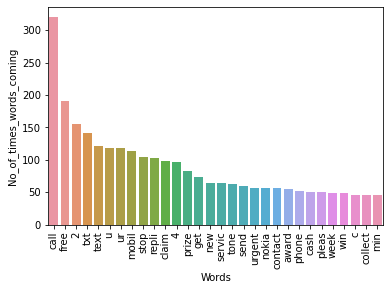

In [133]:
# Visulaiztion to see the frequency of the most used words.


sns.barplot(x,y)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('No_of_times_words_coming')

plt.show()

### Extracting top words in Ham messages

In [134]:
 
ham_corpus=[]  #creating an empty list

for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():            #splitted each word of a sentence
        ham_corpus.append(word)     # Stored those each words in the list we created.

In [135]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [136]:
len(ham_corpus)

35402

* Since ham messages are greater in our dataset, therefore here there are 35K words in total in ham messages.

In [137]:
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 215,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [138]:
ham_word=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['Words','No_of_times'])
ham_word.head()

,Words,No_of_times
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


In [139]:
u=pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
u.head()

0      u
1     go
2    get
3     gt
4     lt
Name: 0, dtype: object

In [140]:
v=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
v.head()

0    883
1    404
2    349
3    288
4    287
Name: 1, dtype: int64

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


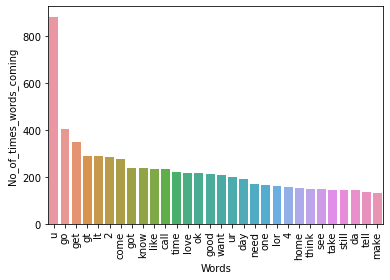

In [141]:
# Visulaiztion to see the frequency of the most used words.


sns.barplot(u,v)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('No_of_times_words_coming')

plt.show()

# Dependent and Independent Variable

In [149]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [150]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [151]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [152]:
X.shape

(5169, 3000)

In [145]:
y=df['Target'].values

In [146]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Data Splitting

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building/Training

In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [163]:
gnb = GaussianNB()

In [166]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
y_pred1

array([0, 0, 1, ..., 1, 0, 0])

# Model Accuracy

In [169]:
print('The Accuracy of the model is: ',accuracy_score(y_test,y_pred1))
print('The precision score is: ',precision_score(y_test,y_pred1))

The Accuracy of the model is:  0.8607350096711799
The precision score is:  0.5020746887966805


In [171]:
print('The confusion matrix is:')
print(confusion_matrix(y_test,y_pred1))

The confusion matrix is:
[[769 120]
 [ 24 121]]


In [176]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n           0       0.97      0.87      0.91       889\n           1       0.50      0.83      0.63       145\n\n    accuracy                           0.86      1034\n   macro avg       0.74      0.85      0.77      1034\nweighted avg       0.90      0.86      0.87      1034\n'